# GUI

In [ ]:
%matplotlib widget

import ipywidgets as widgets
from ipywidgets import GridspecLayout, Label, FloatText, HTMLMath
from ipywidgets import interactive_output, fixed

from translocation_model import TranslocationModel

In [1]:
from gui import Gui

gui = Gui(20)
gui.add_general_parameters(0)
gui.add_SC2R_parameters(9)
gui.add_disc_spiral_parameters(12)
display(gui.grid)
display(gui.parameters)

GridspecLayout(children=(Label(value='General Physical Parameters', layout=Layout(grid_area='widget001')), HTM…

{'ATP_ADP_ratio': FloatText(value=10.0, layout=Layout(grid_area='widget003')),
 'equilibrium_ATP_ADP_ratio': FloatText(value=1.0, layout=Layout(grid_area='widget006')),
 'K_d_ATP': FloatText(value=1.0, layout=Layout(grid_area='widget009')),
 'K_d_ADP': FloatText(value=1.0, layout=Layout(grid_area='widget012')),
 'k_DT': FloatText(value=1.0, layout=Layout(grid_area='widget015')),
 'k_TD': Label(value='0.1', layout=Layout(grid_area='widget018')),
 'k_h': FloatText(value=1.0, layout=Layout(grid_area='widget021')),
 'k_s': FloatText(value=1.0, layout=Layout(grid_area='widget024')),
 'k_up': FloatText(value=1.0, layout=Layout(grid_area='widget028')),
 'k_down': Label(value='1.0', layout=Layout(grid_area='widget031')),
 'n_protomers': FloatText(value=1.0, layout=Layout(grid_area='widget035')),
 'k_h_bar': Label(value='1.0', layout=Layout(grid_area='widget038')),
 'k_extended_to_flat_up': FloatText(value=1.0, layout=Layout(grid_area='widget041')),
 'k_flat_to_extended_down': FloatText(value=1

# Test interactive plot

In [ ]:
%matplotlib widget

from translocation_model import TranslocationModel, SC2R1Loop
import matplotlib.pyplot as plt

In [9]:
%matplotlib widget
import ipywidgets as widgets 
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, fixed

# out = widgets.Output(layout=widgets.Layout(height='300px'))

#fig, ax = plt.subplots()

def f(change):
    #with out:
    # This works!!!
    plt.close(1)
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    #fig, ax = plt.subplots()

    #plt.cla()

    ax.plot([0, 1],[0, 10])
    ax.set_title(change)
    #out.clear_output()  # Required, otherwise output area stays the same but plots get added
    # display(fig)  # Doesn't work as a replacement of plt.show()
    plt.show()  # If not here, multiple plots are shown!

w = widgets.IntSlider(min=0, max=10, value=5)
#w.observe(f, names="value")
out = interactive_output(f, {'change': w})
display(w, out)

IntSlider(value=5, max=10)

Output()

No such comm: 93a9a1d03363495a8607e495e585dd84


No such comm: 3c0c5a71255443acaf4c6bf5ca399f03


No such comm: a0afb05cafeb46288e8cbcb925b13517


IntSlider(value=5, max=10)

Output()

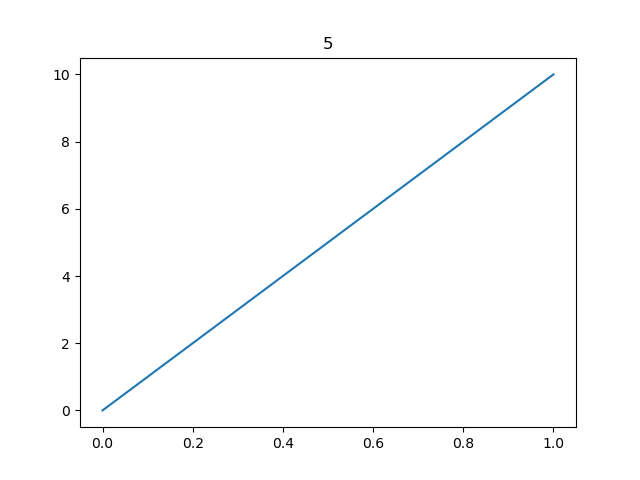

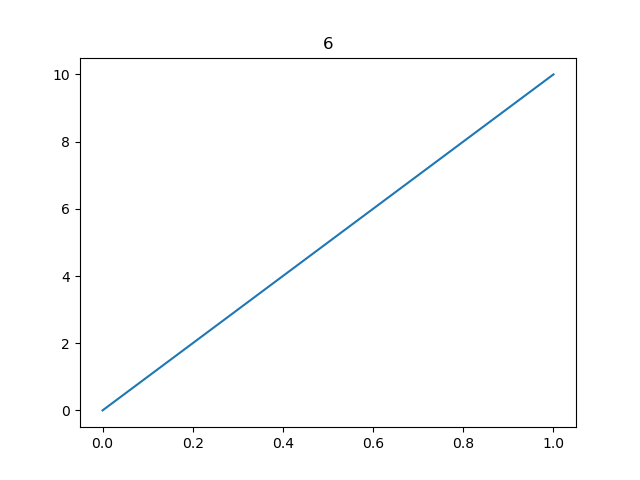

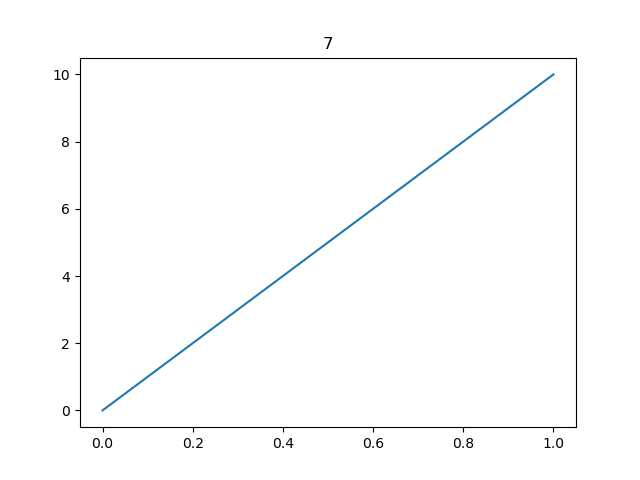

No such comm: 994f397d9ea44ae096d3cdb9da399798
No such comm: fc4e6b95c3be433293e59985deb975e2


In [60]:
%matplotlib widget
import ipywidgets as widgets 
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, fixed

#fig, ax = plt.subplots()

def f2(change):
    # This works!!!
    plt.close(2)
    fig = plt.figure(2)
    ax = fig.add_subplot(111)
    #fig, ax = plt.subplots()

    #plt.cla()

    ax.plot([0, 1],[0, 10])
    ax.set_title(change)

    plt.close(3)
    fig = plt.figure(3)
    ax = fig.add_subplot(111)
    ax.plot([0, 1],[0, 10])
    ax.set_title(change)

    #out2.clear_output()  # Required, otherwise output area stays the same but plots get added
    # display(fig)  # Doesn't work as a replacement of plt.show()
    plt.show()  # If not here, multiple plots are shown!

w2 = widgets.IntSlider(min=0, max=10, value=5)
#w.observe(f, names="value")
out2 = interactive_output(f2, {'change': w2})
display(w2, out2)

# Imports

In [ ]:
%matplotlib widget

In [ ]:
from translocation_model import (SC2R1Loop, SC2R2Loops, DiscSpiral, 
                                 DefectiveSC2R, DefectiveDiscSpiral)

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
savefig = False # Indicate if we want to save the figures

# Simple Gillespie trajectories

## Spiraling in Control: Sequential Clockwise/2-Residue Step



### 1 loop

![](SC_2R_1_loop_kinetic_scheme.jpg)

In [ ]:
SC_2R_1_loop = SC2R1Loop()
trajectories = SC_2R_1_loop.gillespie(n_simulations=5, 
    cumulative_sums=['position', 'ATP'])
ax = SC_2R_1_loop.plot_position_evolution(
    list(trajectory[['timestamp', 'position']] for trajectory in trajectories),
    time_unit=r"$1/k_\uparrow$", 
    position_unit="Residues", 
    kinetic_scheme_image_path="SC_2R_1_loop_kinetic_scheme.jpg",
    title="Sequential Clockwise/2-Residue Step, 1 loop"
)
plt.show()

### 2 loops

![](SC_2R_2_different_loops_kinetic_scheme.jpg)

TODO create image

In [ ]:
SC_2R_2_loops = SC2R2Loops()
trajectories = SC_2R_2_loops.gillespie(n_simulations=5,
    cumulative_sums=['position', 'ATP'])
ax = SC_2R_2_loops.plot_position_evolution(
    list(trajectory[['timestamp', 'position']] for trajectory in trajectories),
    time_unit=r"$1/k_\uparrow$", 
    position_unit="Residues", 
    kinetic_scheme_image_path="SC_2R_2_different_loops_kinetic_scheme.jpg",
    title="Sequential Clockwise/2-Residue Step, 2 loops"
)
plt.show()

## Disc-Spiral model

![](Disc_spiral_kinetic_scheme.jpg)

In [ ]:
disc_spiral = DiscSpiral()
trajectories = disc_spiral.gillespie(n_simulations=5,
    cumulative_sums={'position': 'displacement', 'ATP': 'ATP'})
ax = disc_spiral.plot_position_evolution(
    list(trajectory[['timestamp', 'position']] for trajectory in trajectories),
    time_unit=r"$1/k_⤴$", 
    position_unit="Residues", 
    kinetic_scheme_image_path="Disc_spiral_kinetic_scheme.jpg",
    title="Disc Spiral/2(N-1)-Residue Step"
)
plt.show()

# Experiments

## Relation between ATP/ADP concentrations ratio and velocity

In [ ]:
models = [SC2R1Loop(), SC2R2Loops(), DiscSpiral()]
ratios = np.logspace(-3, 5, 100) * SC_2R_1_loop.equilibrium_ATP_ADP_ratio
velocities = {model: [] for model in models}
for ratio in ratios:
    for model in models:
        model.ATP_ADP_ratio = ratio
        velocities[model].append(model.average_velocity())

for model in models:
    plt.plot(ratios, velocities[model], label=model.__class__.__name__)
plt.xscale('log')
plt.xlabel("ATP/ADP ratio")
plt.ylabel("Average velocity")
plt.legend()
plt.show()

## Sequential Clockwise/2-Residue Step, comparison between 1 and 2 loops

In [ ]:
# 1 loop and 2 loops models
SC_2R_1_loop = SC2R1Loop()
SC_2R_2_loops = SC2R2Loops()

ATP_ADP_ratios = np.logspace(-1, 1, 10)
for ATP_ADP_ratio in ATP_ADP_ratios:
    print("ATP/ADP:", ATP_ADP_ratio)
    SC_2R_1_loop.ATP_ADP_ratio = ATP_ADP_ratio
    SC_2R_2_loops.ATP_ADP_ratio = ATP_ADP_ratio
    print({node: attributes['probability']() 
           for node, attributes 
           in SC_2R_1_loop.kinetic_scheme.nodes(data=True)})
    print({node: attributes['probability']() 
           for node, attributes 
           in SC_2R_2_loops.kinetic_scheme.nodes(data=True)})



## Add potential

In [ ]:
# If positive, potential increases when chaperone goes up, i.e. it favors going
# down.
potential_over_temperature = 0.1
SC_2R_1_loop = SC2R1Loop()
for _, _, attributes in SC_2R_1_loop.kinetic_scheme.edges(data=True):
    if 'position' in attributes and attributes['position'] > 0:
        old_rate = attributes['rate']
        attributes['rate'] = (
            lambda old_rate=old_rate: 
                old_rate() * np.exp(-potential_over_temperature))
    elif 'position' in attributes and attributes['position'] < 0:
        old_rate = attributes['rate']
        attributes['rate'] = (
            lambda old_rate=old_rate: 
                old_rate() * np.exp(potential_over_temperature))

SC_2R_1_loop_position = SC_2R_1_loop.gillespie(
    n_steps=1000, 
    n_simulations=1, 
    cumulative_sums={'position': 'displacement'})

ax = SC_2R_1_loop.plot_position_evolution(
    SC_2R_1_loop_position[['timestamp', 'position']],
    time_unit=r"a.u.", 
    position_unit="Residues", 
    kinetic_scheme_image_path="SC_2R_1_loop_kinetic_scheme.jpg",
    title="Sequential Clockwise/2-Residue Step, 1 loop"
)

## Defective protomer

In [ ]:
sc2r = SC2R1Loop()
defective_sc2r = DefectiveSC2R()
disc_spiral = DiscSpiral()
defective_disc_spiral = DefectiveDiscSpiral()

defect_factors = np.logspace(-3, 0, 100)
velocities = {
    'SC2R': [],
    'Disc spiral': [],
    'Defective SC2R': [],
    'Defective disc spiral': [],
}
for defect_factor in defect_factors:
    defective_sc2r.defect_factor = defect_factor
    defective_disc_spiral.defect_factor = defect_factor
    velocities['SC2R'].append(sc2r.average_velocity())
    velocities['Disc spiral'].append(disc_spiral.average_velocity())
    velocities['Defective SC2R'].append(defective_sc2r.average_velocity())
    velocities['Defective disc spiral'].append(
        defective_disc_spiral.average_velocity())

fig, ax = plt.subplots()
for model in velocities:
    ax.plot(defect_factors, velocities[model], label=model)
ax.axvline(1, color='k', linestyle='--')
ax.set_xscale('log')
ax.set_xlabel("Defect factor")
ax.set_ylabel("Average velocity")
ax.legend()
plt.show()
# print max velocity
print("Max velocity for SC2R:", max(velocities['SC2R']))
print("Max velocity for Disc spiral:", max(velocities['Disc spiral']))
print("Max velocity for Defective SC2R:", max(velocities['Defective SC2R']))
print("Max velocity for Defective disc spiral:", 
      max(velocities['Defective disc spiral']))


# Test interactivity

In [ ]:
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi, 100)
tau = np.linspace(0.5, 10, 100)

def f1(x, tau, beta):
    return np.sin(x * tau) * x * beta
def f2(x, tau, beta):
    return np.sin(x * beta) * x * tau


fig, ax = plt.subplots()
controls = iplt.plot(x, f1, tau=tau, beta=(1, 10, 100), label="f1")
iplt.plot(x, f2, controls=controls, label="f2")
_ = plt.legend()
plt.show()

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [ ]:
sc2r = SC2R1Loop()
box = widgets.FloatText(
    value=1,
    description=r'\(k_\uparrow\):',
    #disabled=False
)
slider = widgets.FloatSlider(
    value=1,
    min=0,
    max=10.0,
    step=0.1,
    description=r'slider',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
def update_k_up(k_up: float):
    sc2r.k_up = k_up
    box.value = sc2r.k_up
interact(update_k_up, k_up=slider)
#out = widgets.HBox([box])
display(slider)
#display(out)
display(box)

In [ ]:
from ipywidgets import GridspecLayout, Button, Layout
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

grid = GridspecLayout(4, 3, height='300px')
grid[:3, 1:] = create_expanded_button('One', 'success')
grid[:, 0] = create_expanded_button('Two', 'info')
grid[3, 1] = create_expanded_button('Three', 'warning')
grid[3, 2] = create_expanded_button('Four', 'danger')
grid

In [ ]:
from ipywidgets import GridspecLayout, FloatText, Label, HTMLMath
from ipywidgets import Label

def add_parameter(
        grid: GridspecLayout,
        row: int,
        symbol: str,
        desc: str,
        value: float = 1.0
):
    grid[row, 0] = HTMLMath(value=symbol)
    grid[row, 1] = FloatText(value=value)
    grid[row, 2] = Label(value=desc)

grid = GridspecLayout(8, 3, height='300px')
grid[0, :] = Label(value="General physical parameters")
add_parameter(grid, 1, r"$\frac{[\text{ATP}]}{[\text{ADP}]}\Bigr|_\text{eq.}$",
              "Equilibrium ATP/ADP concentration ratio")
add_parameter(grid, 2, r"$K_d^\text{ATP}$", 
              "Protomer-ATP dissociation constant")
add_parameter(grid, 3, r"$K_d^\text{ADP}$",
              "Protomer-ADP dissociation constant")
add_parameter(grid, 4, r"$k_{DT}$", "Effective ADP->ATP exchange rate")
add_parameter(grid, 5, r"$k_{TD}$", "Effective ATP->ADP exchange rate")
add_parameter(grid, 6, r"$k_h$", "ATP hydrolysis rate")
add_parameter(grid, 7, r"$k_s$", "ATP synthesis rate")
display(grid)


display(widgets.Box([Label(value=str(grid[2, 1].value))]))
display(widgets.Box([Label(value="test")]))


In [ ]:
# Get FloatText widget, not value
for e in grid.children:
    print(e)

In [ ]:
a = widgets.IntSlider()
b = grid.children[2] # widgets.IntSlider()
x = widgets.IntSlider()
ui = widgets.HBox([a, b, x])
def f(a, b, c):
    print((a, b, c))
    print(a + b + c)

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': x})

display(ui, out)